# Feature Matching

We will check out 3 methods:
- Brute-Force Matching with ORB Descriptors
- Brute-Force Matching with SIFT Descriptors and Ratio Test
- FLANN based Matcher


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)     

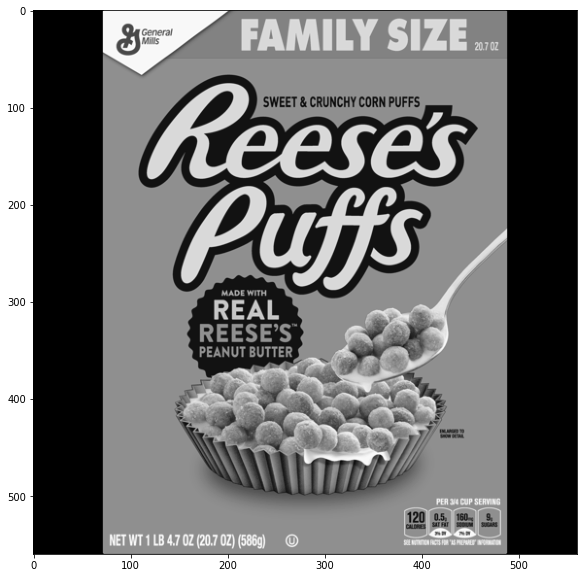

In [4]:
display(reeses)


In [5]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0) 

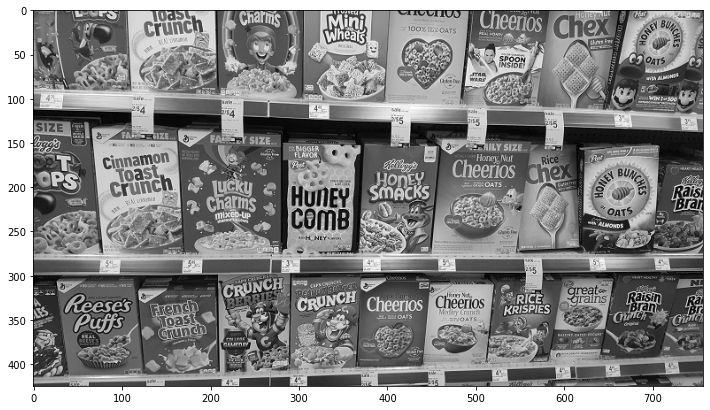

In [6]:
display(cereals)

--------
# Brute Force Detection with ORB Descriptors

In [7]:
orb = cv2.ORB_create()

In [8]:
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [9]:
bf =cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
matches = bf.match(des1,des2)

In [11]:
matches

[<DMatch 0x109527fb0>,
 <DMatch 0x121840a30>,
 <DMatch 0x1218408f0>,
 <DMatch 0x121840590>,
 <DMatch 0x1218409f0>,
 <DMatch 0x121840cd0>,
 <DMatch 0x121840490>,
 <DMatch 0x121840570>,
 <DMatch 0x1218408d0>,
 <DMatch 0x121840d90>,
 <DMatch 0x121840d50>,
 <DMatch 0x1218409d0>,
 <DMatch 0x121840fd0>,
 <DMatch 0x1218409b0>,
 <DMatch 0x121840930>,
 <DMatch 0x121840eb0>,
 <DMatch 0x121840db0>,
 <DMatch 0x121840f30>,
 <DMatch 0x121840f10>,
 <DMatch 0x1218404d0>,
 <DMatch 0x121891030>,
 <DMatch 0x121891050>,
 <DMatch 0x121891070>,
 <DMatch 0x121891090>,
 <DMatch 0x1218910b0>,
 <DMatch 0x1218910d0>,
 <DMatch 0x1218910f0>,
 <DMatch 0x121891110>,
 <DMatch 0x121891130>,
 <DMatch 0x121891150>,
 <DMatch 0x121891170>,
 <DMatch 0x121891190>,
 <DMatch 0x1218911b0>,
 <DMatch 0x1218911d0>,
 <DMatch 0x1218911f0>,
 <DMatch 0x121891210>,
 <DMatch 0x121891230>,
 <DMatch 0x121891250>,
 <DMatch 0x121891270>,
 <DMatch 0x121891290>,
 <DMatch 0x1218912b0>,
 <DMatch 0x1218912d0>,
 <DMatch 0x1218912f0>,
 <DMatch 0x

In [12]:
single_matches = matches[0]

In [13]:
single_matches.distance

69.0

In [14]:
len(matches)

263

In [15]:
matches = sorted(matches, key=lambda x: x.distance )

In [16]:
resses_matches = cv2.drawMatches(reeses, kp1,cereals, kp2, matches[:25], None, flags=2)

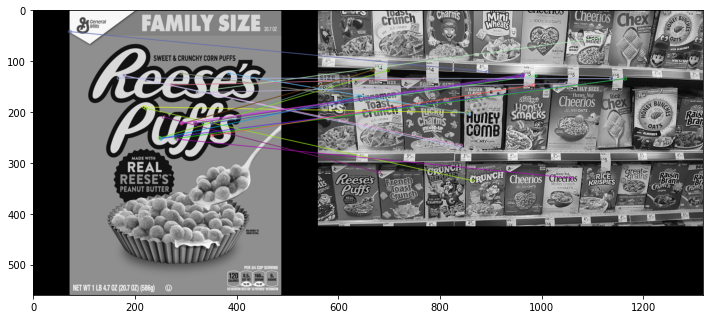

In [17]:
display(resses_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

In [18]:
sift = cv2.xfeatures2d.SIFT_create()

In [19]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [20]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [22]:
matches[0]

[<DMatch 0x1218a40b0>, <DMatch 0x109578eb0>]

In [23]:
# Apply ratio test
good = []
# LESS DISTANCE == BETTER MATCH
# RATIO  MATCH1 < 75% MATCH2
for match1, match2 in matches:
    #IF MATCH1 DISTANCE IS LESS THEN 75% OF MATCH 2 DISTANCE
    #THEN -> GOOD MATCH
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [24]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

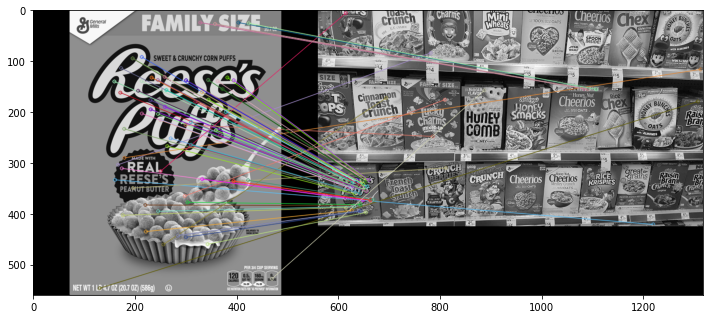

In [25]:
display(sift_matches)

# FLANN based Matcher

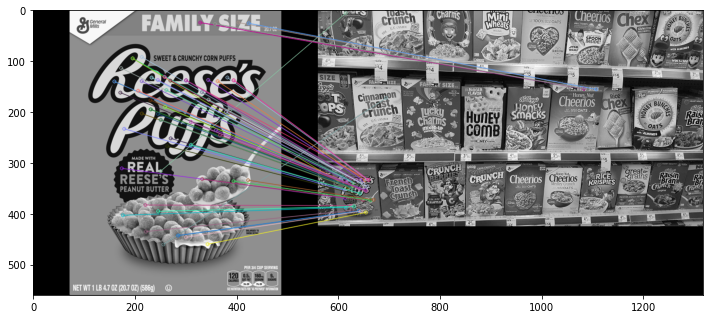

In [29]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLAN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2, k=2)

good = []
for match1, match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])
        
flann_matches = cv2.drawMatchesKnn(reeses, kp1,cereals , kp2,good , None,flags=2)

display(flann_matches)

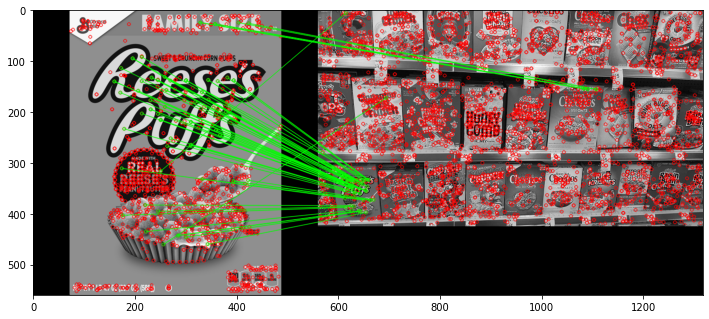

In [31]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLAN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2, k=2)

matchesMask = [[0,0] for i in range(len(matches))]


for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        matchesMask[i] = [1,0]

draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)    
        
flann_matches = cv2.drawMatchesKnn(reeses, kp1,cereals , kp2, matches , None, **draw_params)

display(flann_matches)